# Graph Embedding in Siegel Space

## Problem: Are Siegel spaces better suited for graph embedding problems than hyperbolic space?

The primary objective of graph embedding is to find a geometric realization of a given graph so that the ambient geometry of the space reveals structural properties about the graph. Euclidean space is the most popular choice for embedding because it is easiest to visualize. However, many graphs have non-Euclidean structure. The hyperbolic plane is also a popular choice of target space for embedding because the constant negative curvature allow one to control the distortion of distance between nodes.

In 2021, the authors in [1] propose the use of Siegel spaces for such problems. Their hypothesis is that Siegel spaces are superior choices for embedding problems when one does not have a priori knowledge of the internal structure of one's data. Then they demonstrate many instances where their methods of graph embedding into Siegel space are superior to more traditional embeddings into Euclidean and hyperbolic space. See [2] and [3] for a couple examples.


In [4]:
from geomstats.datasets.utils import load_karate_graph
import geomstats.backend as gs
import geomstats.visualization as visualization
from geomstats.geometry import siegel
import plotly.graph_objects as go
import networkx as nx

Our project will test their hypothesis on the Zachary karate data set. This data set is a graph with vertices representing students and edges representing relationships between students. The goal of graph embedding on this data set is to learn a representation such that clustering of the nodes reflect cliques within the class.



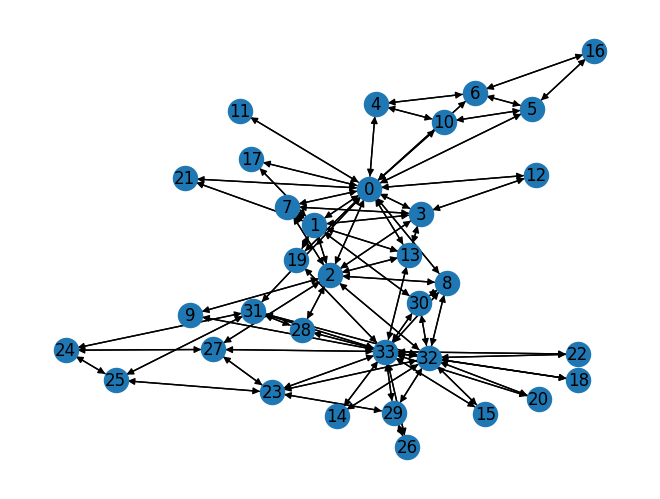

In [5]:
karate_graph= load_karate_graph()
g = nx.DiGraph(karate_graph.edges)
nx.draw(g,with_labels=True)

# Embedding into Hyperbolic space
On the geomstats website, there is an example of how to learn such an embedding using the hyperbolic plane. The way it is done there is to randomly embed the graph into the hyperbolic plane as shown below. 

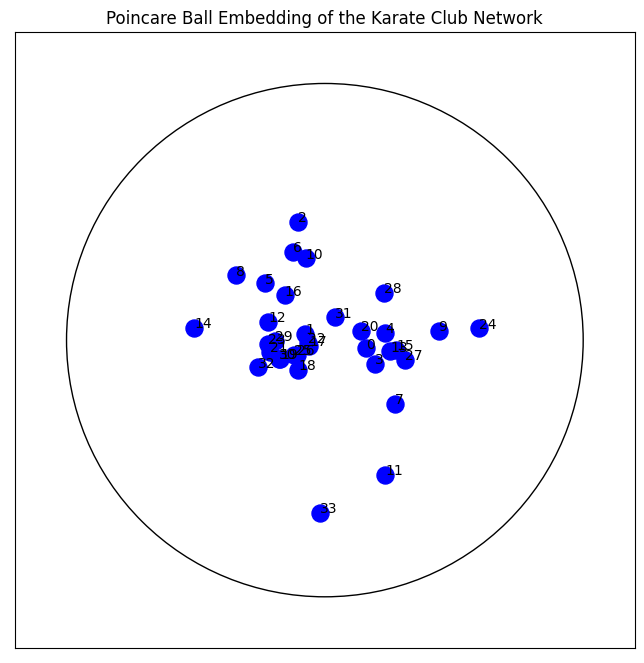

In [25]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

embeddings = gs.random.normal(size=(karate_graph.n_nodes, 2))*0.2

circle = visualization.PoincareDisk(coords_type="ball")
fig, ax = plt.subplots(figsize=(8, 8))
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
circle.set_ax(ax)
circle.draw(ax=ax)
for i_embedding, embedding in enumerate(embeddings):
    x = embedding[0]
    y = embedding[1]
    pt_id = i_embedding
    plt.scatter(x, y, color='blue', s=150)
    ax.annotate(pt_id, (x, y))

plt.tick_params(which="both")
plt.title("Poincare Ball Embedding of the Karate Club Network")
plt.show()

After this is done, we find the best way to embed the graph in such a way that nodes, which are connected to one another, are placed nearer together in the hyperbolic plane. This step is done using machine learning to minimized a loss function given by the geometry of the manifold. The resulting graph can be seen below.


In [36]:
from geomstats.datasets import prepare_graph_data
Hyperbolic=prepare_graph_data.HyperbolicEmbedding(2)
Embedding_H=Hyperbolic.embed(karate_graph)

INFO: Number of edges: 34
INFO: Mean vertices by edges: 4.588235294117647
INFO: iteration 0 loss_value 1.746868
INFO: iteration 1 loss_value 1.668391
INFO: iteration 2 loss_value 1.589048
INFO: iteration 3 loss_value 1.546186
INFO: iteration 4 loss_value 1.474871
INFO: iteration 5 loss_value 1.445632
INFO: iteration 6 loss_value 1.460421
INFO: iteration 7 loss_value 1.430469
INFO: iteration 8 loss_value 1.443978
INFO: iteration 9 loss_value 1.410120
INFO: iteration 10 loss_value 1.381413
INFO: iteration 11 loss_value 1.400215
INFO: iteration 12 loss_value 1.414454
INFO: iteration 13 loss_value 1.373145
INFO: iteration 14 loss_value 1.367831
INFO: iteration 15 loss_value 1.334484
INFO: iteration 16 loss_value 1.391570
INFO: iteration 17 loss_value 1.347718
INFO: iteration 18 loss_value 1.349719
INFO: iteration 19 loss_value 1.381761
INFO: iteration 20 loss_value 1.346044
INFO: iteration 21 loss_value 1.343227
INFO: iteration 22 loss_value 1.352752
INFO: iteration 23 loss_value 1.340461


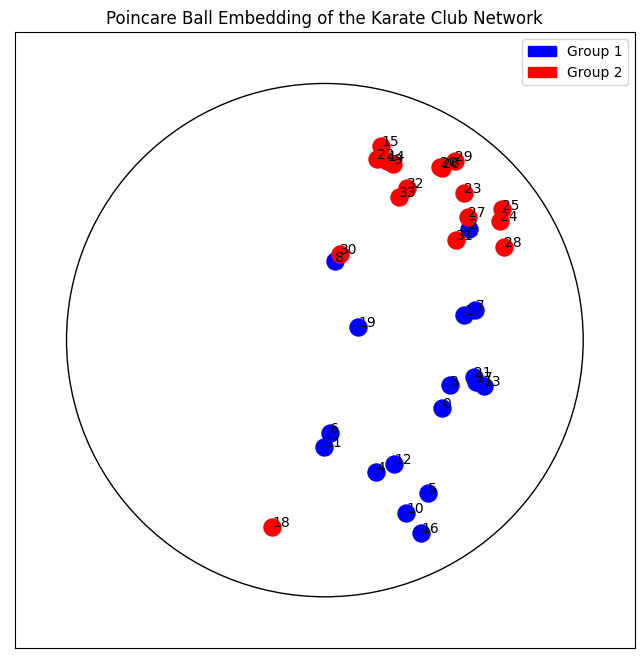

In [37]:
colors = {1: "b", 2: "r"}
group_1 = mpatches.Patch(color=colors[1], label="Group 1")
group_2 = mpatches.Patch(color=colors[2], label="Group 2")

circle = visualization.PoincareDisk(coords_type="ball")

fig, ax = plt.subplots(figsize=(8, 8))
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
circle.set_ax(ax)
circle.draw(ax=ax)
for i_embedding, embedding in enumerate(Embedding_H):
    x = embedding[0]
    y = embedding[1]
    pt_id = i_embedding
    plt.scatter(x, y, c=colors[karate_graph.labels[pt_id][0]], s=150)
    ax.annotate(pt_id, (x, y))

plt.tick_params(which="both")
plt.title("Poincare Ball Embedding of the Karate Club Network")
plt.legend(handles=[group_1, group_2])
plt.show()

Here we see that after doing machine learning, the graph is embedded in such a way that the dots are clustered together based on their colors. 

# Visualizing Siegel Space Embedding

The Siegel upper half space is the set $\{X+iY\in Sym(n,\mathbb{C}) : Y >>0\}$ where the condition $Y>>0$ indicates that $Y$ is positive definite i.e. the real number $z^*Yz$ is positive for all vectors $z\in \mathbb{C}^n$. One can think of it as a complex generalization of the upper half space model of the hyperbolic plane.

Visual representations of Siegel space are challenging due to high dimensionality. So we will instead follow the example of [1]. We will embed into the rank 2 Siegel space and visualize a vector valued distance.

For non-compact symmetric spaces (like the Siegel upper half space), its rank is the maximal dimension of an isometrically embedded Euclidean submanifold (isometric to $\mathbb{R}^n$). Vector valued distance is a generalized version of distance in symmetric space which accounts for the aditional symmetry of our symmetric space. In the rank 2 Siegel space, the vector valued distance between embedded nodes will just be a collection of vectors in $\mathbb{R}^2$.

To visualize vector valued distances, we will color the edges of our graph based on the vector valued distances between the incident nodes inherited from the learned embedding into Siegel space. One can see section 6 of [1] for examples on how such a process can reveal internal structure about the graph. A simplified example from the paper is shown below.



<center><img src="siegelgraph.png" width=650px alt=\"default\"/></center>

# References
[1] Federico L´opez, Beatrice Pozzetti, Steve Trettel, Michael Strube, and Anna Wienhard. Symmetric spaces for graph embeddings: A finsler-riemannian approach. arXiv preprint arXiv:2106.04941, 2021a.

[2] Lopez, F. and Strube, M. A fully hyperbolic neural ´ model for hierarchical multi-class classification. In Findings of the Association for Computational Linguistics: EMNLP 2020, pp. 460–475, Online, November 2020. Association for Computational Linguistics. URL https://www.aclweb.org/anthology/ 2020.findings-emnlp.42.

[3] Sala, F., De Sa, C., Gu, A., and Re, C. Representation tradeoffs for hyperbolic embeddings. In Dy, J. and Krause, A. (eds.), Proceedings of the 35th International Conference on Machine Learning, volume 80 of Proceedings of Machine Learning Research, pp. 4460– 4469, Stockholmsmassan, Stockholm Sweden, 10–15 ¨ Jul 2018. PMLR. URL http://proceedings.mlr. press/v80/sala18a.html.

Group members: Ricky Lee And Benedict Lee. Both contributed equally to this notebook.